![Dr. Semmelweis](ignaz_semmelweis_1860.jpeg)

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on June 1st, 1847, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital.

The data is stored as two CSV files within the `data` folder.

`yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

In [1]:
# Imported libraries
library(tidyverse)

# Start coding here..

# Load and inspect the data
#yearly <- read_csv('C:/Users/JusticePC/Downloads/data/yearly_deaths_by_clinic.csv')
yearly <- read_csv('data/yearly_deaths_by_clinic.csv')
yearly

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 12 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): clinic
dbl (3): year, births, deaths

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,births,deaths,clinic
<dbl>,<dbl>,<dbl>,<chr>
1841,3036,237,clinic 1
1842,3287,518,clinic 1
1843,3060,274,clinic 1
1844,3157,260,clinic 1
1845,3492,241,clinic 1
1846,4010,459,clinic 1
1841,2442,86,clinic 2
1842,2659,202,clinic 2
1843,2739,164,clinic 2


In [6]:
#monthly <- read_csv("C:/Users/JusticePC/Downloads/data/monthly_deaths.csv")
monthly <- read_csv('data/monthly_deaths.csv')
head(monthly)

Rows: 98 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl  (2): births, deaths
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


date,births,deaths
<date>,<dbl>,<dbl>
1841-01-01,254,37
1841-02-01,239,18
1841-03-01,277,12
1841-04-01,255,4
1841-05-01,255,2
1841-06-01,200,10


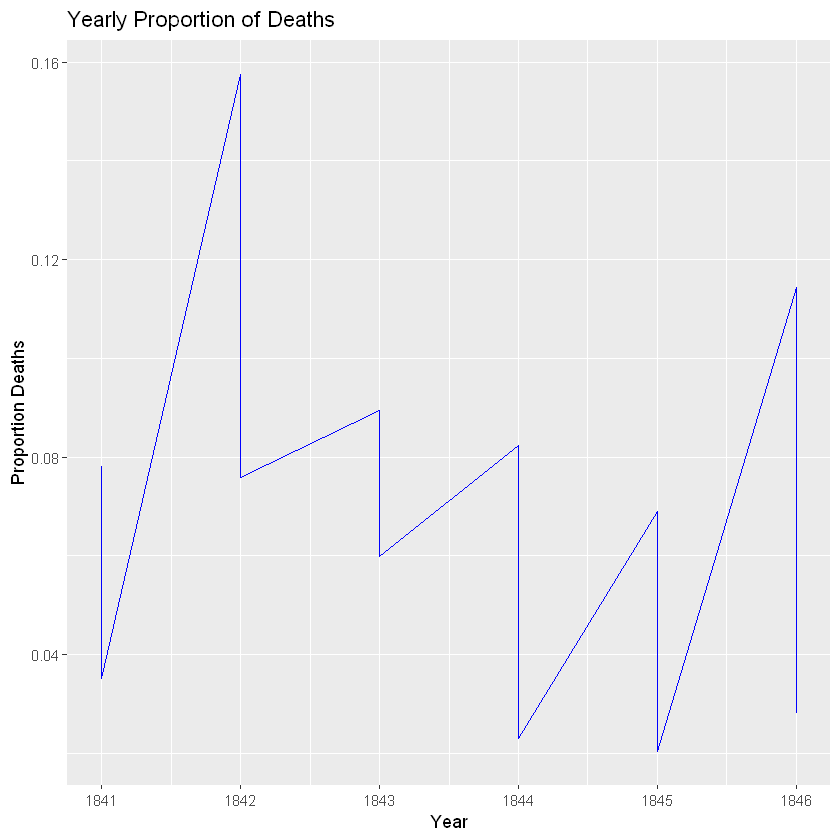

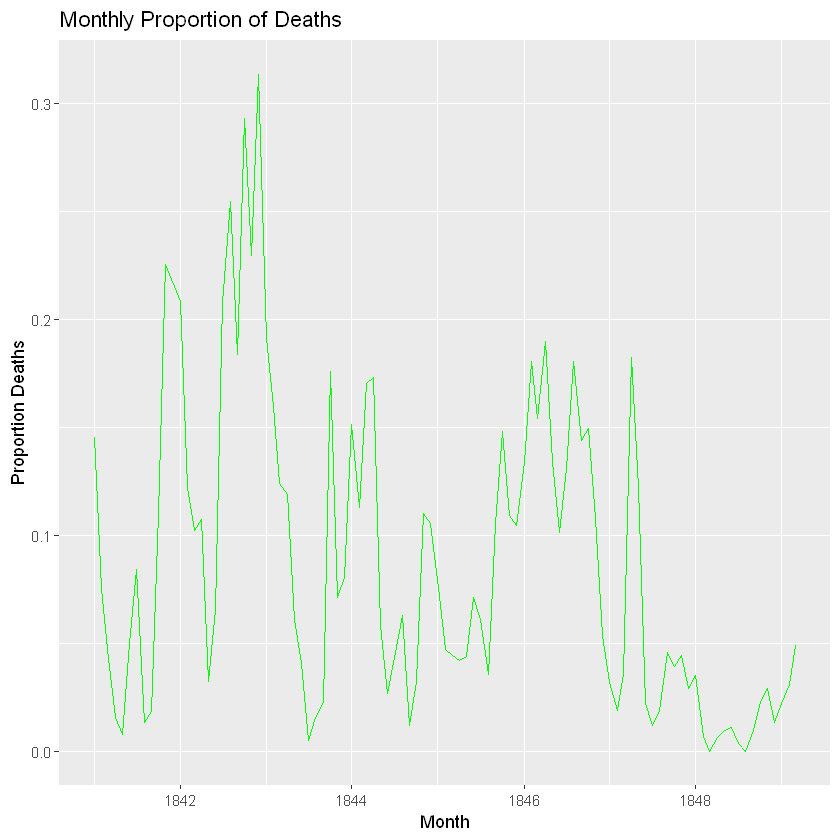

In [7]:
# Add proportion_deaths to both data frames
yearly <- yearly %>% 
  mutate(proportion_deaths = deaths / births)

monthly <- monthly %>% 
  mutate(proportion_deaths = deaths / births)

# Plot the data
ggplot(yearly, aes(x = year, y = proportion_deaths)) +
  geom_line(color = "blue") + labs(title = "Yearly Proportion of Deaths", x = "Year", y = "Proportion Deaths")

ggplot(monthly, aes(date, proportion_deaths)) +
  geom_line(color = "green") +
  labs(title = "Monthly Proportion of Deaths", x = "Month", y = "Proportion Deaths")

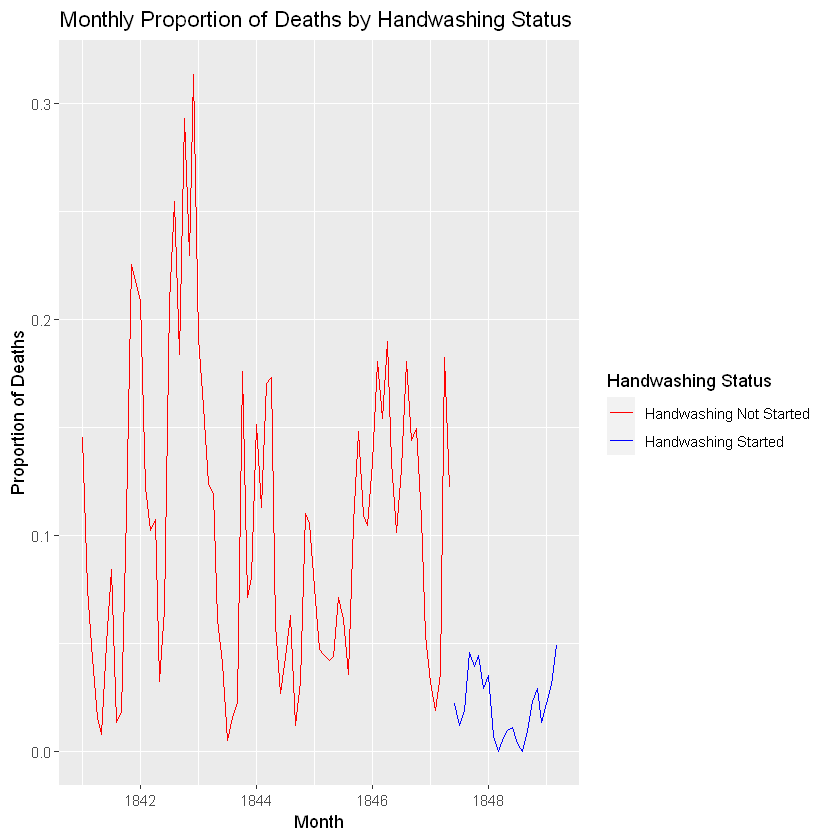

In [8]:
# Add the threshold and flag and plot again
handwashing_start = as.Date('1847-06-01')

# filtered_data <- monthly[monthly$Month > filter_date, ]

monthly <- monthly %>%
  mutate(handwashing_started = date >= handwashing_start)


# Split the monthly dataframe into two based on handwashing_started
monthly_started <- monthly %>%
  filter(handwashing_started == TRUE)

monthly_not_started <- monthly %>%
  filter(handwashing_started == FALSE)


# Plot monthly proportion of deaths for both started and not started handwashing
monthly_plot_both <- ggplot() +
  geom_line(data = monthly_started, aes(x = date, y = proportion_deaths, color = "Handwashing Started")) +
  geom_line(data = monthly_not_started, aes(x = date, y = proportion_deaths, color = "Handwashing Not Started")) +
  labs(title = "Monthly Proportion of Deaths by Handwashing Status",
       x = "Month",
       y = "Proportion of Deaths",
       color = "Handwashing Status") +
  scale_color_manual(values = c("Handwashing Started" = "blue", "Handwashing Not Started" = "red"))

# Show the plot
print(monthly_plot_both)



#ggplot(monthly, aes(x = handwashing_started, y = proportion_deaths)) +
#  geom_line() + scale_color_manual(values = c("TRUE" = "blue", "FALSE" = "red"))

In [9]:
# Find the mean
monthly_summary <- monthly %>% 
  group_by(handwashing_started) %>%
  summarize(mean_proportion_deaths = mean(proportion_deaths))

monthly_summary

handwashing_started,mean_proportion_deaths
<lgl>,<dbl>
FALSE,0.10504998
TRUE,0.02109338


In [10]:
# by what percentage did washing of hands reduced mortality
reduction_in_death_rate <- monthly_summary$mean_proportion_deaths[monthly_summary$handwashing_started == 'FALSE'] -
  monthly_summary$mean_proportion_deaths[monthly_summary$handwashing_started == 'TRUE']

reduction_in_death_rate_percent = reduction_in_death_rate * 100

# Print the result
print(paste("Handwashing reduced the monthly death rates by an average of", round(reduction_in_death_rate_percent, 2), "%"))

[1] "Handwashing reduced the monthly death rates by an average of 8.4 %"
